In [1]:
import sys
print(sys.path)

['E:\\学习\\5药物研发\\靶点发现\\下游任务\\单细胞\\跨物种\\came\\CAME_3\\analysis\\jupyterlab\\0liver', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\python39.zip', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\DLLs', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39', '', 'C:\\Users\\10360\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\Pythonwin']


In [2]:
import os
import time
import torch
import shutil
import warnings
import argparse
import importlib
import scanpy as sc

import pandas as pd
import numpy as mp

from CAMEX.base import Dataset
from CAMEX.trainer import Trainer

warnings.filterwarnings("ignore")

In [3]:
from params import PARAMS

In [4]:
sc.settings.set_figure_params(facecolor='white', frameon=False, dpi=300, dpi_save=300, figsize=(4, 4))

In [5]:
def clear_fig(fig):
    if fig:
        fig.axes[0].set_xlabel(None)
        fig.axes[0].set_ylabel(None)
        fig.tight_layout()
    else:
        pass
    return fig

In [6]:
# path = './'

In [7]:
time_start = time.strftime("%Y-%m-%d-%H-%M-%S")
log_path = f'./log/{time_start}/'
for k, v in PARAMS.items():
    v['time_start'] = time_start
    v['log_path'] = log_path
print(log_path)

./log/2024-03-13-21-23-12/


In [8]:
os.makedirs(log_path, exist_ok=True)
shutil.copy('params.py', log_path + 'params_current.py')
print(f'time: {time_start}')

time: 2024-03-13-21-23-12


In [9]:
#  —————————————————————————————————— 1 preprocess
print('start preprocess')
dataset = Dataset(**PARAMS['preprocess'])
# torch.save(dataset, log_path + 'dataset_preprocessed.pt')
# dataset = torch.load(f'{args.path}/log/2023-06-06-09-02-45/dataset_preprocessed.pt')
adata_CAMEX = dataset.adata_whole
dgl_data = dataset.dgl_data

start preprocess
                    raw-liver-human-Martin: reference  raw-liver-monkey-Martin: query  raw-liver-mouse-Martin: query  raw-liver-zebrafish-ggj5: query
Hepatocytes                                    2705.0                          5340.0                         2888.0                           5594.0
Endothelial                                     700.0                          1455.0                          427.0                            158.0
fibroblasts                                     353.0                           612.0                          413.0                              NaN
Cholangio                                       197.0                           365.0                           35.0                              NaN
Macrophages                                     170.0                             NaN                            NaN                             91.0
Kupffer cells                                     NaN                           364

In [10]:
print('start train')
trainer = Trainer(adata_CAMEX, dgl_data, **PARAMS['train'])

start train


In [11]:
trainer.pretrain()

--------------------------------------------- pretrain ---------------------------------------------
epoch: 0, loss: 199.39898575676813
epoch: 1, loss: 28.461908128526474
epoch: 2, loss: 27.9992520014445
epoch: 3, loss: 27.708818170759415
epoch: 4, loss: 27.499289883507622
epoch: 5, loss: 27.38602664735582
epoch: 6, loss: 27.31842433081733
epoch: 7, loss: 27.213652822706436
epoch: 8, loss: 27.17246060901218
epoch: 9, loss: 27.124277962578667


In [12]:
adata_CAMEX.write_h5ad(log_path + 'adata_CAMEX.h5ad', compression='gzip')

# analysis

In [8]:
log_path

'./log/2024-03-13-21-23-12/'

In [9]:
adata_CAMEX = sc.read_h5ad(log_path + 'adata_CAMEX.h5ad')
adata_CAMEX

AnnData object with n_obs × n_vars = 22417 × 2000
    obs: 'cell_ontology_class', 'batch', 'n_genes_by_counts', 'total_counts', 'cell_ontology_class_num', 'cell_class', 'cell_class_num'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'cell_type', 'data_order', 'dataset_description', 'dataset_type', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'cell_pretrain_hidden'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [10]:
adata_CAMEX.obsm['cell_pretrain_hidden'].shape

(22417, 128)

In [11]:
sc.pp.neighbors(adata_CAMEX, use_rep='cell_pretrain_hidden')

In [12]:
sc.tl.umap(adata_CAMEX)

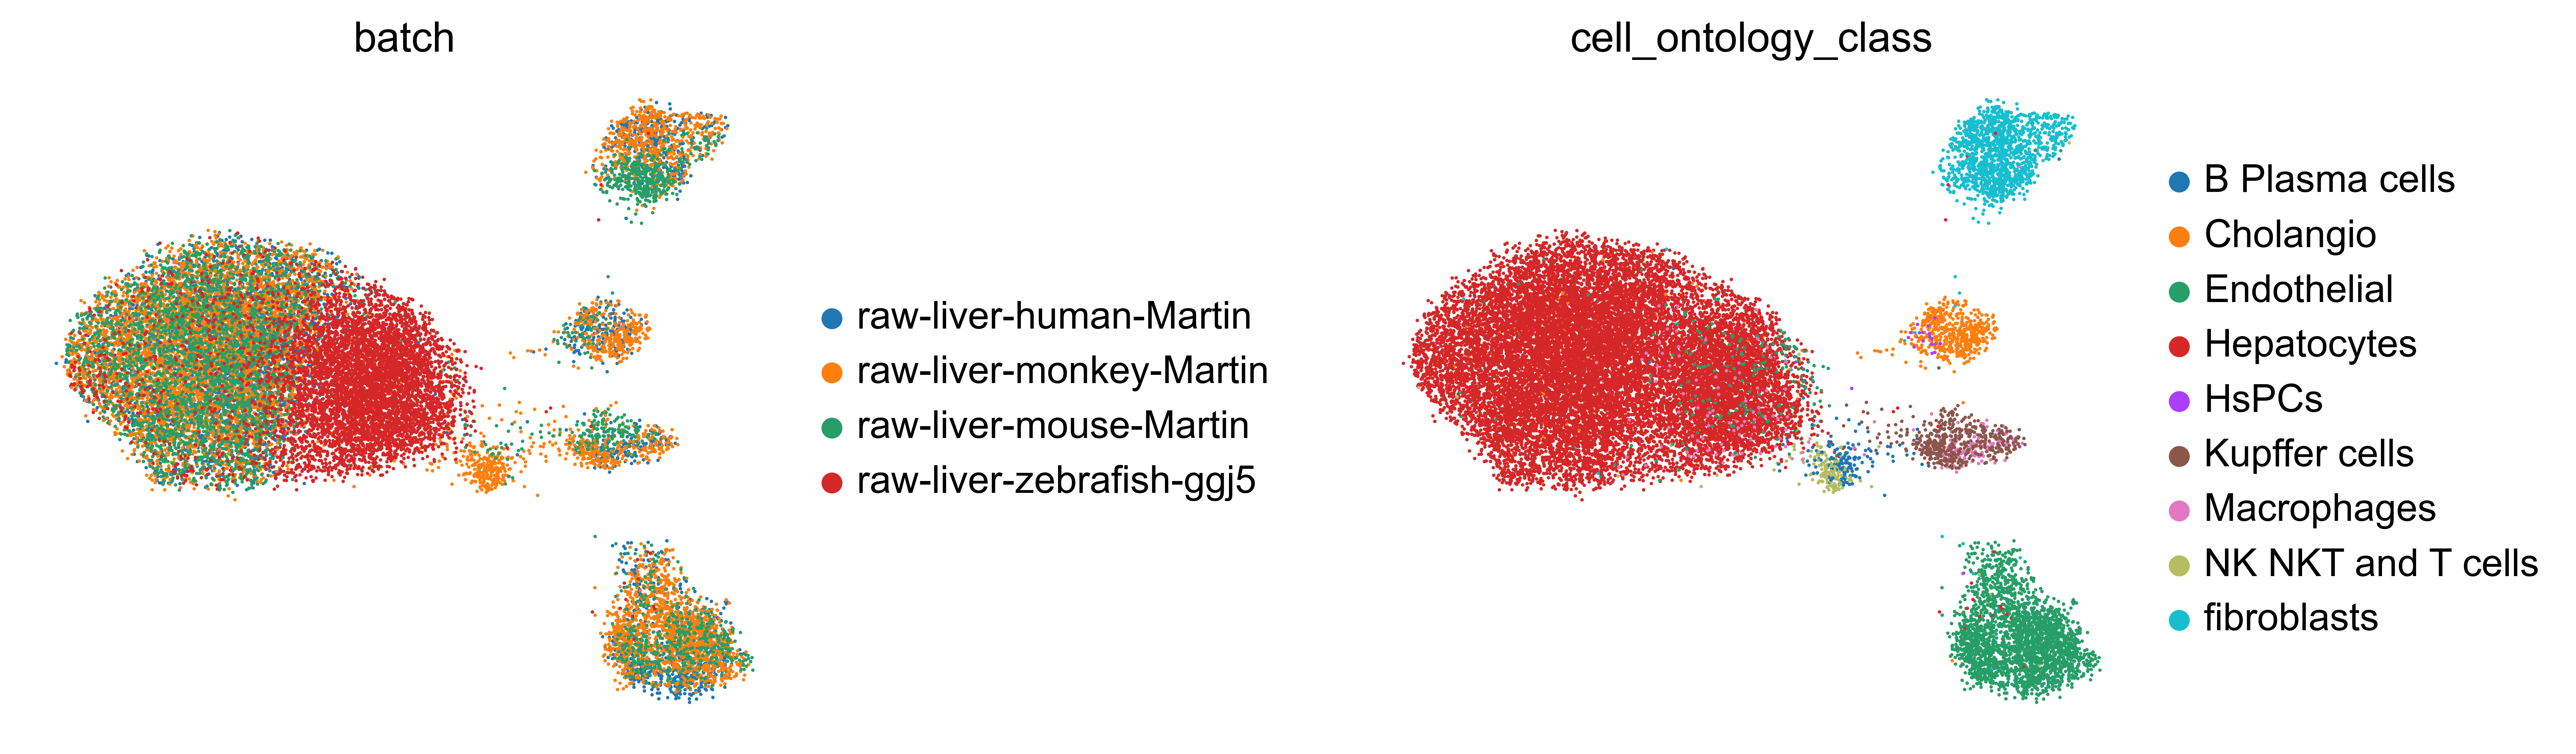

In [13]:
sc.pl.umap(adata_CAMEX, color=['batch', 'cell_ontology_class'], wspace=0.6)

In [14]:
adata_CAMEX.obs.loc[:, 'batch'].unique()

['raw-liver-human-Martin', 'raw-liver-monkey-Martin', 'raw-liver-mouse-Martin', 'raw-liver-zebrafish-ggj5']
Categories (4, object): ['raw-liver-human-Martin', 'raw-liver-monkey-Martin', 'raw-liver-mouse-Martin', 'raw-liver-zebrafish-ggj5']

# Harmony
# We provide an expression matrix aligned by one-to-one homologous genes

In [30]:
adata_CAMEX = sc.read_h5ad(log_path + 'adata_CAMEX.h5ad')
adata_CAMEX

AnnData object with n_obs × n_vars = 22417 × 2000
    obs: 'cell_ontology_class', 'batch', 'n_genes_by_counts', 'total_counts', 'cell_ontology_class_num', 'cell_class', 'cell_class_num'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'cell_type', 'data_order', 'dataset_description', 'dataset_type', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'cell_pretrain_hidden'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [31]:
adata_4species_CAMEX = sc.AnnData(X=adata_CAMEX.raw.X, obs=adata_CAMEX.obs, var=adata_CAMEX.raw.var, uns=adata_CAMEX.uns)
adata_4species_CAMEX.raw = adata_4species_CAMEX
adata_4species_CAMEX.layers['counts'] = adata_CAMEX.raw.X.toarray()

In [32]:
adata_4species_CAMEX.X.max()

657.0

In [33]:
sc.pp.normalize_total(adata_4species_CAMEX)
sc.pp.log1p(adata_4species_CAMEX)

In [34]:
adata_4species_CAMEX.X.max()

6.062208

In [35]:
sc.pp.highly_variable_genes(adata_4species_CAMEX, batch_key='batch', subset=True, n_top_genes=2000)
adata_4species_CAMEX

AnnData object with n_obs × n_vars = 22417 × 2000
    obs: 'cell_ontology_class', 'batch', 'n_genes_by_counts', 'total_counts', 'cell_ontology_class_num', 'cell_class', 'cell_class_num'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type', 'data_order', 'dataset_description', 'dataset_type', 'hvg', 'log1p', 'neighbors', 'pca'
    layers: 'counts'

In [36]:
sc.pp.pca(adata_4species_CAMEX)

In [37]:
sc.pp.neighbors(adata_4species_CAMEX)

In [38]:
sc.tl.umap(adata_4species_CAMEX)

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


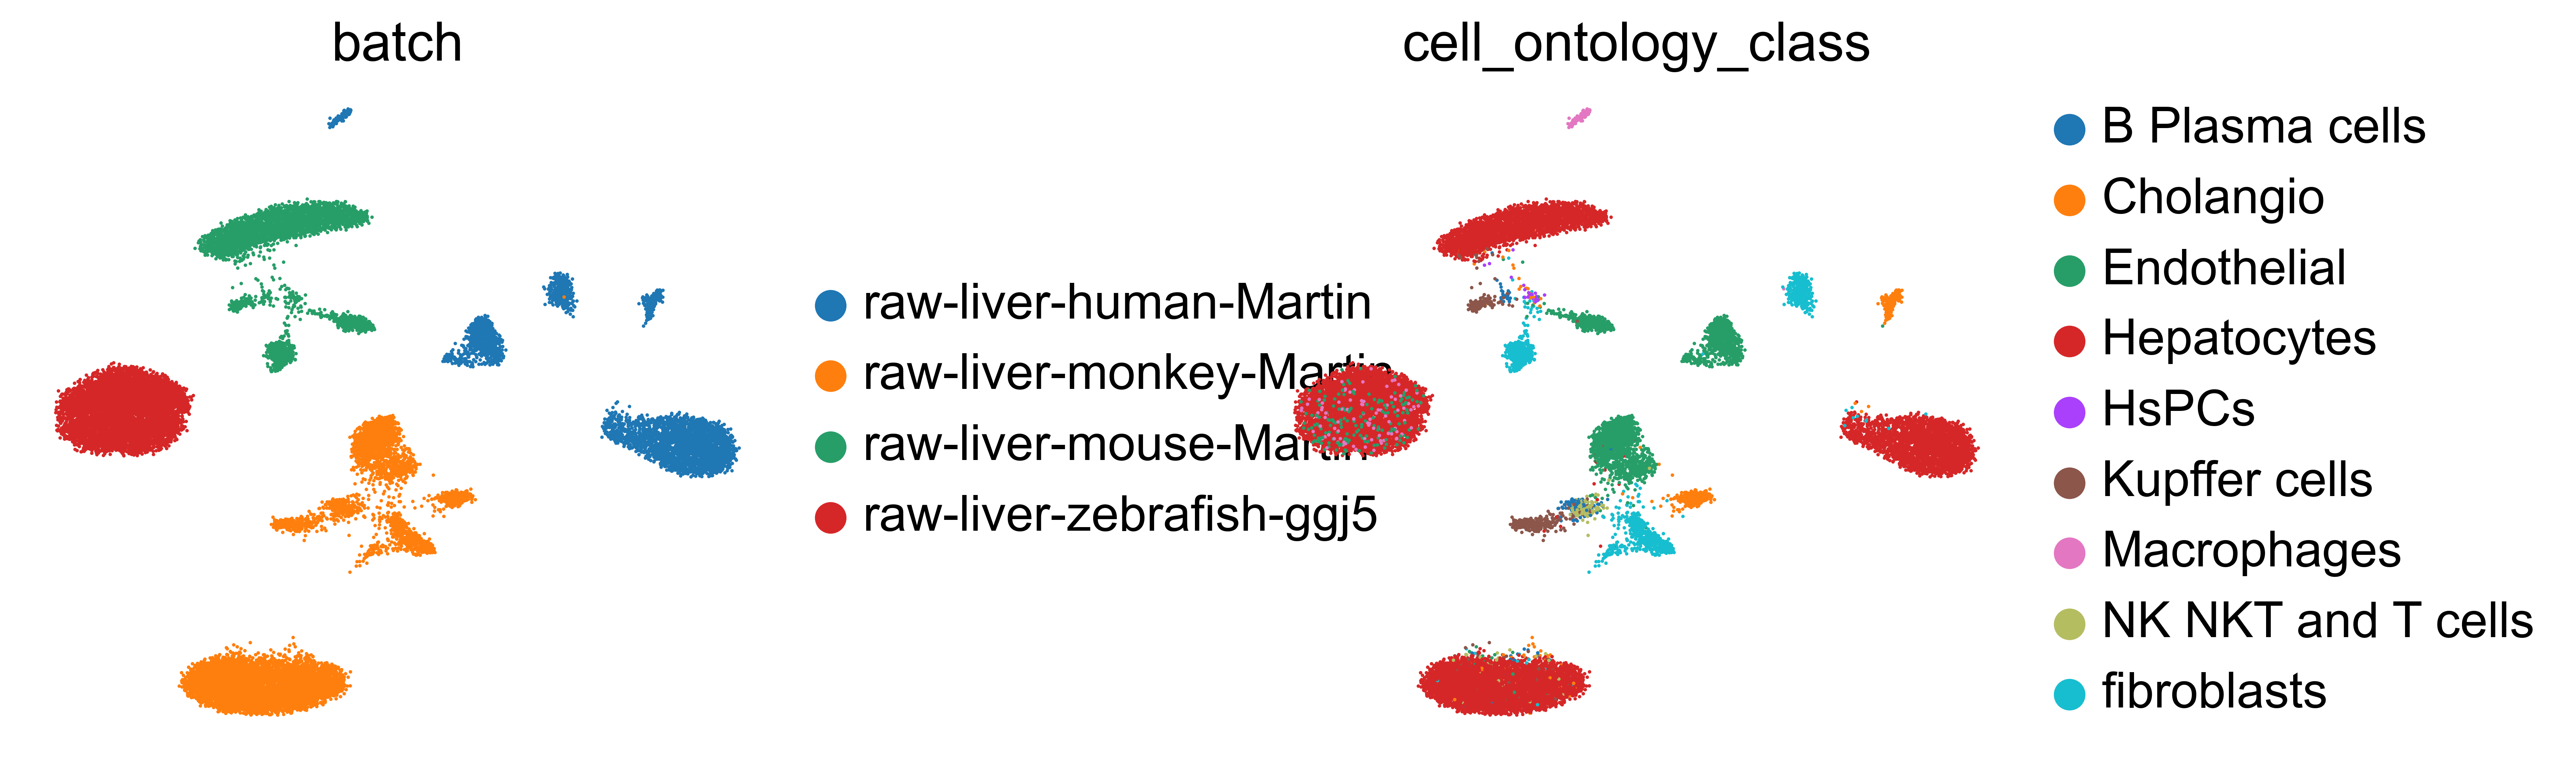

In [39]:
sc.pl.umap(adata_4species_CAMEX, color=['batch', 'cell_ontology_class'], wspace=0.5)

# harmnoy

In [42]:
import scanpy.external as sce

In [43]:
adata_harmony = adata_4species_CAMEX.copy()
adata_raw = adata_4species_CAMEX.copy()
adata_harmony.X.max(), adata_raw.X.max()

(5.3807874, 5.3807874)

In [44]:
sce.pp.harmony_integrate(adata_harmony, 'batch')

2024-03-15 07:31:38,213 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-03-15 07:31:45,298 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-03-15 07:31:45,498 - harmonypy - INFO - Iteration 1 of 10
2024-03-15 07:31:58,510 - harmonypy - INFO - Iteration 2 of 10
2024-03-15 07:32:08,219 - harmonypy - INFO - Converged after 2 iterations


C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


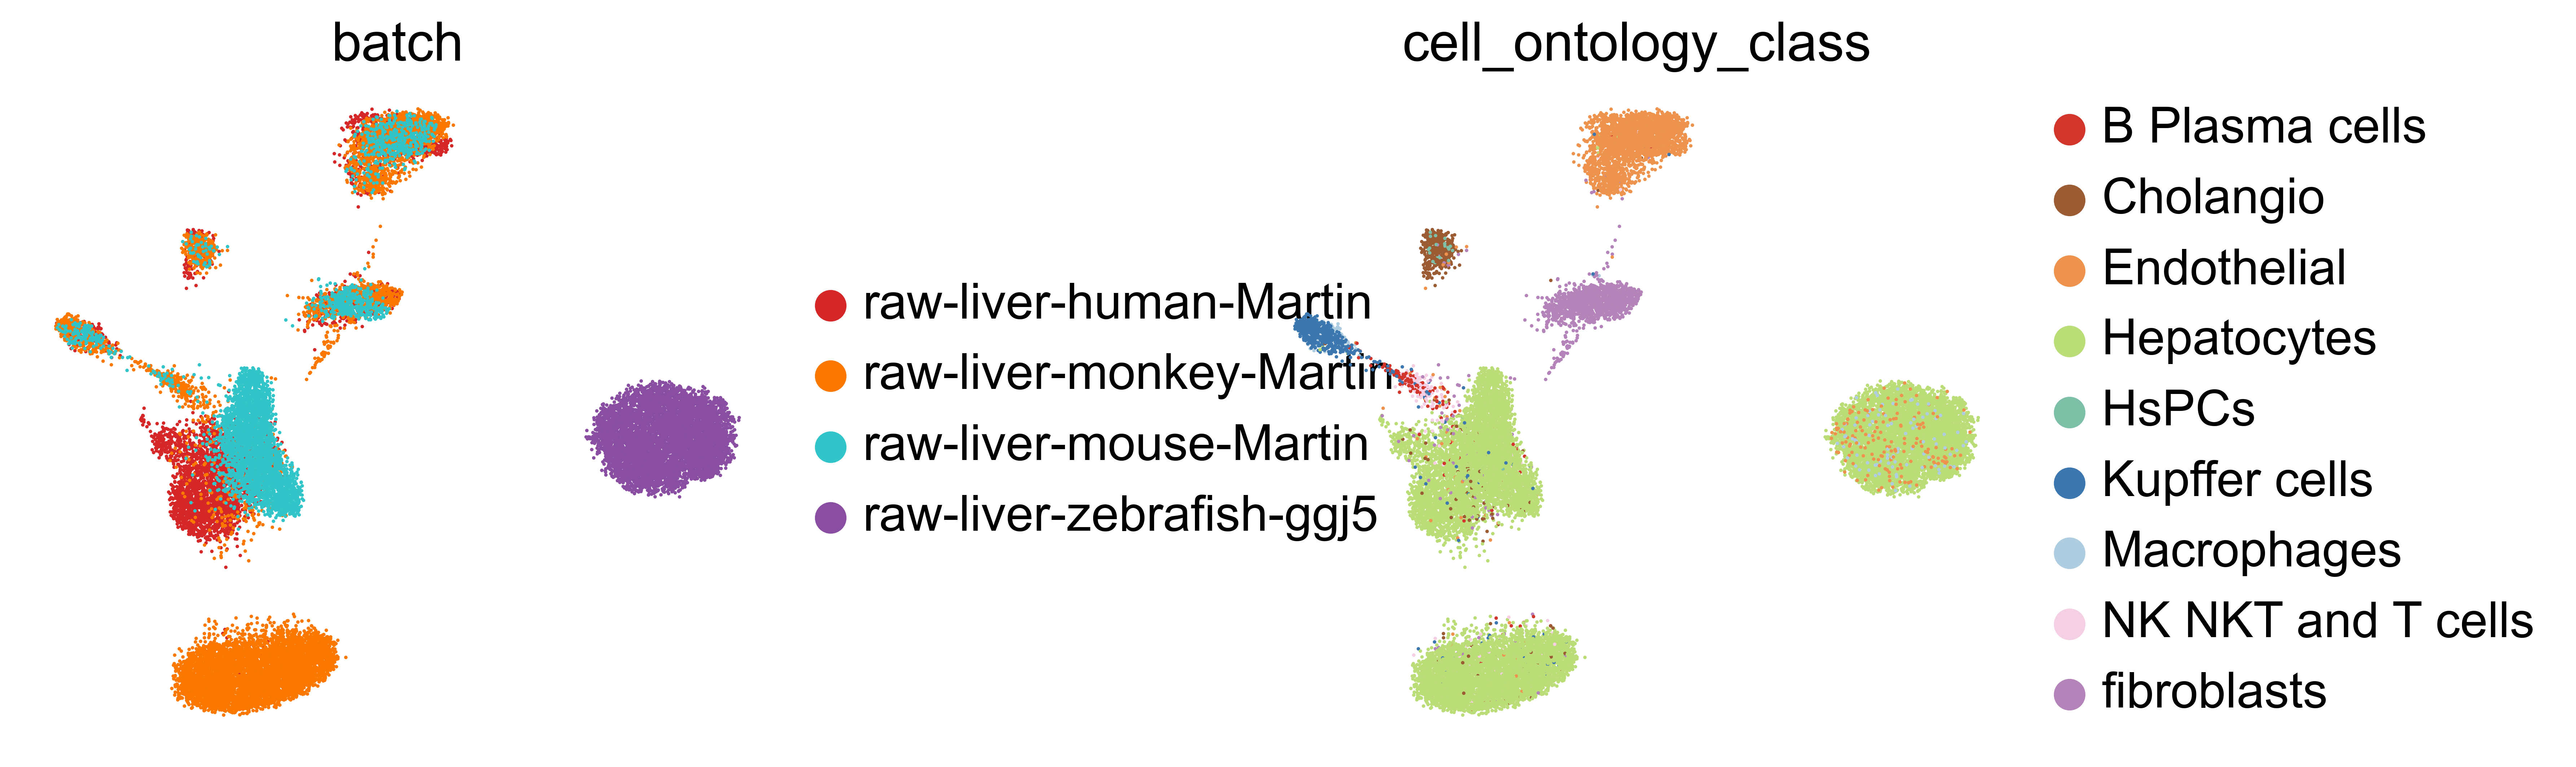

In [45]:
sc.pp.neighbors(adata_harmony, use_rep='X_pca_harmony')
sc.tl.umap(adata_harmony)
sc.pl.umap(adata_harmony, color=['batch', 'cell_ontology_class'], wspace=0.5)